In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#주어진 영상 (img1.jpg)에 빨강, 파랑, 초록색의 점을 각각 설정한 개수만큼 무작위로 생성하는 프로그램 작성
img1 = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/img1.jpg")
img1R = cv2.calcHist([img1], [0], None, [256], [0, 256])
img1G = cv2.calcHist([img1], [1], None, [256], [0, 256])
img1B = cv2.calcHist([img1], [2], None, [256], [0, 256])
img1R = img1R[255][0]
img1G = img1G[255][0]
img1B = img1B[255][0]
samedata = [0] * 3
h, w, _  = img1.shape
img2 = np.zeros_like(img1)
size = h * w
num =[np.random.randint(0, size) for _ in range(3)]
colorNum = [np.random.choice(size, num[i], replace= False) for i in range(3)]
for i in range(0, 3) :
    for pos in colorNum[i]:
        x = pos // w
        y = pos %  w 
        img2[x][y][i] = 255
        if img1[x][y][i] == 255 :
            samedata[i] +=1

img2R = cv2.calcHist([img2], [0], None, [256], [0, 256])
img2G = cv2.calcHist([img2], [1], None, [256], [0, 256])
img2B = cv2.calcHist([img2], [2], None, [256], [0, 256])
img2R = img2R[255][0]
img2G = img2G[255][0]
img2B = img2B[255][0]

image = cv2.add(img1, img2)

imgR = cv2.calcHist([image], [0], None, [256], [0, 256])
imgG = cv2.calcHist([image], [1], None, [256], [0, 256])
imgB = cv2.calcHist([image], [2], None, [256], [0, 256])
imgR = imgR[255][0]
imgG = imgG[255][0]
imgB = imgB[255][0]

data = [
        [img1R, img1G, img1B],
        [img2R, img2G, img2B],
        [imgR,  imgG ,  imgB],
        samedata
]

print(data)
cv2.imshow('dst2', img2)
cv2.imshow('dst', img1)
cv2.imshow('result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[513.0, 513.0, 513.0], [131837.0, 154477.0, 53637.0], [132074.0, 154652.0, 54032.0], [276, 338, 118]]


In [9]:
#주어진 영상 (img2.jpg)를 이용해 다음과 같은 두 영상을 생성하는 프로그램을 작성하고 히스토그램 일치 여부를 확인 및 결과 분석
img1 = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/img2.jpg")
h, w, _ = img1.shape
st = 0
ed = 255

img_2 = np.zeros_like(img1, dtype=np.uint8)
img_3 = np.zeros_like(img1, dtype=np.uint8)
gradient = np.linspace(st, ed, h, dtype=np.uint8)
for x in range(h):
    img_2[x, :, :] = gradient[x]
    img_3[x, :, :] = ed - gradient[x]


cv2.imshow('gradient', img_2)
image = cv2.subtract(img1, img_2)
image_2 = cv2.subtract(img1, img_3)
cv2.imshow('image', image)
cv2.imshow('image_2', image_2)
cv2.waitKey(0)
cv2.destroyAllWindows()


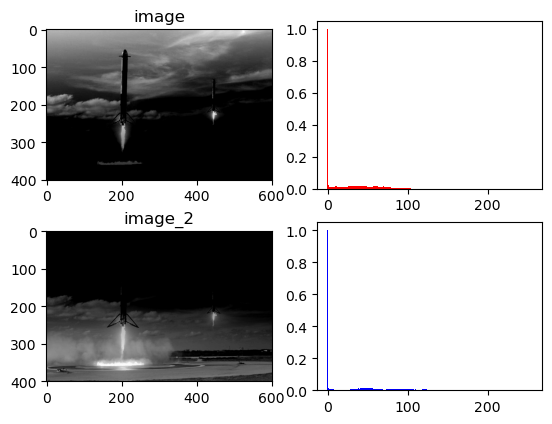

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [5]:

cv2.imwrite("image.jpg", image)
cv2.imwrite("image_2.jpg", image_2)
image = cv2.imread("./image.jpg", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("./image_2.jpg", cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([image], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image_2], [0], None, [256], [0, 256])
hist1 = hist1.ravel() / hist1.max()
hist2 = hist2.ravel() / hist2.max()

x= np.arange(256)
plt.subplot(221), plt.imshow(image, 'gray'), plt.title("image")
plt.subplot(222), plt.bar(x, hist1, width=1, color='r') #plt.xlim([0, 256])
plt.subplot(223), plt.imshow(image_2, 'gray'), plt.title("image_2")
plt.subplot(224), plt.bar(x, hist2, width=1,  color='b') #plt.xlim([0, 256])
plt.show()

In [7]:
#주어진 영상 (img3.jpg, img4.jpg, img5.jpg) 를 이용해 다음의 영상을 완성할 것
img1 = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/img3.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/img4.jpg", cv2.IMREAD_COLOR)
logo = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/img5.jpg", cv2.IMREAD_COLOR)

h, w, _ = img1.shape
img2 = cv2.resize(img2, dsize=(w, h))
add_image = cv2.subtract(img1, img2)
rows, cols, _ = logo.shape
roi = np.zeros_like(logo)
for x in range(rows) :
    for y in range(cols) :
        roi[x, y, :] = add_image[x + h//2, y + w//4, :]

logo2gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(logo2gray, 200, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img_bg = cv2.bitwise_and(roi, roi, mask=mask)
logo_fg = cv2.bitwise_and(logo, logo, mask=mask_inv)
dst = cv2.add(img_bg, logo_fg)
for x in range(rows) :
    for y in range(cols) :
        add_image[x + h//2, y + w//4, :] = dst[x, y, :]
cv2.imshow('image', add_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

def MyKernelConv(arr, kernel, y, x, height, width, L):
    sum, sumKernel =0, 0
    for i in range(-1, L-1):
        for j in range(-1, L-1):
            if((y+ i) >= 0 and (y +i) < height and (x + j) >= 0 and (x + j) < width):
                sum += arr[y+i, x+j] * kernel[i+1, j+1]
                sumKernel += kernel[i+1, j+1]
    if sumKernel != 0:
        return sum / sumKernel
    else:
        return sum                  
def mygaussianFilter(width, sigma):
    array = np.arange((width//2)* (-1), width//2 +1)
    arr = np.zeros((width, width))

    for x in range(width):
        for y in range(width):
            arr[x, y] = array[x]**2 + array[y]**2
    kernel = np.zeros((width, width))

    for x in range(width):
        for y in range(width):
            kernel[x, y] = np.exp(-arr[x, y] / (2 * sigma**2))
    # 정규화                                  
    kernel = kernel / kernel.sum()

    return  kernel
gMat = cv2.getGaussianKernel(9, 1)
TgMat = gMat.T
gMat_2d = np.outer(gMat, TgMat)
myFilter = mygaussianFilter(9, 1)


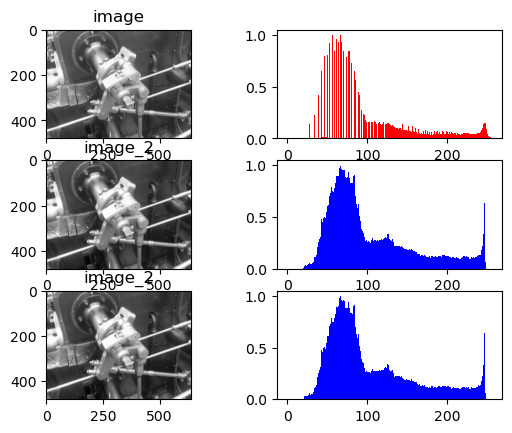

In [10]:
image = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/gear.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
#행렬 내적 구현
                         
image_2 = np.zeros_like(image, dtype=np.float32)
image_3 = np.zeros_like(image, dtype=np.float32)

h, w = image.shape
for x in range(h):
    for y in range(w):
        image_2[x, y] = MyKernelConv(image, myFilter, x, y, h, w, 9)
        image_3[x, y] = MyKernelConv(image, gMat_2d, x, y,h, w, 9)

image = image.astype(np.uint8)
image_2 = image_2.astype(np.uint8)
image_3 = image_3.astype(np.uint8)
hist1 = cv2.calcHist([image],   [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image_2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([image_3], [0], None, [256], [0, 256])
hist1 = hist1.ravel() / hist1.max()
hist2 = hist2.ravel() / hist2.max()
hist3 = hist3.ravel() / hist3.max()

x= np.arange(256)
plt.subplot(321), plt.imshow(image, 'gray'), plt.title("image")
plt.subplot(322), plt.bar(x, hist1, width=1, color='r'), plt.xlim([-1, 256])

plt.subplot(323), plt.imshow(image_2, 'gray'), plt.title("image_2")
plt.subplot(324), plt.bar(x, hist2, width=1,  color='b'), plt.xlim([-1, 256])

plt.subplot(325), plt.imshow(image_3, 'gray'), plt.title("image_3")
plt.subplot(326), plt.bar(x, hist3, width=1,  color='g'), plt.xlim([-1, 256])
plt.show()

In [13]:
img = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/gear.jpg", cv2.IMREAD_GRAYSCALE)
output45 = np.zeros_like(img)
output135 = np.zeros_like(img)
h, w = img.shape

kernel45 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]], dtype=np.float32)
kernel135 = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]], dtype=np.float32)

for i in range(h):
    for j in range(w):
        output45[i, j] = abs(MyKernelConv(img, kernel45, i, j, h, w, 3))
        output135[i, j] = abs(MyKernelConv(img, kernel135, i, j, h, w, 3))

cv2.imshow("output45", output45.astype(np.uint8))
cv2.imshow("output135", output135.astype(np.uint8))
output = (output45 + output135) / 2
cv2.imshow("output", output.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()